Librerias para trabajar con la red neuronal y procesamiento de datos

In [1]:
import os
import numpy as np # type: ignore
from scipy.io import loadmat # type: ignore
import tensorflow as tf # Para red neuronal profunda
import numpy as np
import matplotlib.pyplot as plt
import time # Para tomar el tiempo de entrenamiento de la red
import math

In [2]:
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

##################################################################################<br>
##################### Convertir matrices de .mat a .npy ##########################<br>
##################################################################################

Directorios de entrada y salida

In [3]:
input_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_matlab/codigo_fuente/matrices_complejas_pam_mat' # matrices en formato .mat
input_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_matlab/codigo_fuente/matrices_complejas_vsc_mat' # matrices en formato .mat
output_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_python' # INPUT PARA LA RED
output_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_python' # OUTPUT O SALIDAS ESPERADAS PARA LA RED

Crear los directorios de salida si no existen

In [4]:
os.makedirs(output_pam_dir, exist_ok=True)
os.makedirs(output_vsc_dir, exist_ok=True)

Funcion para convertir archivos .mat a .npy

In [5]:
def convert_mat_to_npy(input_dir, output_dir, prefix):
    for i in range(1, 31):
        mat_file = os.path.join(input_dir, f'{prefix}_noise_{i}.mat')
        npy_file = os.path.join(output_dir, f'{prefix}_noise_{i}.npy')
        
        # Cargar el archivo .mat
        mat_data = loadmat(mat_file)
        
        # Extraer la matriz compleja
        matrix_key = [key for key in mat_data.keys() if not key.startswith('__')][0]
        matrix = mat_data[matrix_key]
        
        # Guardar la matriz en formato .npy
        np.save(npy_file, matrix)

Convertir archivos .mat a .npy para PAM y VSC

In [6]:
convert_mat_to_npy(input_pam_dir, output_pam_dir, 'matrix_complex_pam')
convert_mat_to_npy(input_vsc_dir, output_vsc_dir, 'matrix_complex_vsc')

###################################################################################<br>
##################### Conversion a tensor tridimensional ##########################<br>
###################################################################################

Directorios de entrada y salida

In [7]:
input_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_python'
input_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_python'
output_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_procesadas'
output_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_procesadas'

Crear directorios de salida si no existen

In [8]:
os.makedirs(output_pam_dir, exist_ok=True)
os.makedirs(output_vsc_dir, exist_ok=True)

Funcion para procesar las matrices complejas

In [9]:
def procesar_matriz_compleja(matriz_compleja):
    datos_organizados = np.stack((matriz_compleja.real, matriz_compleja.imag), axis=-1)
    return datos_organizados

Procesar matrices complejas en la carpeta input_pam_dir

In [10]:
for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        input_path = os.path.join(input_pam_dir, filename)
        output_path = os.path.join(output_pam_dir, filename)
        
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        # Procesar la matriz compleja
        datos_organizados = procesar_matriz_compleja(matriz_compleja)
        
        # Guardar los datos procesados
        np.save(output_path, datos_organizados)

Procesar matrices complejas en la carpeta input_vsc_dir

In [11]:
for filename in os.listdir(input_vsc_dir):
    if filename.endswith('.npy'):
        input_path = os.path.join(input_vsc_dir, filename)
        output_path = os.path.join(output_vsc_dir, filename)
        
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        # Procesar la matriz compleja
        datos_organizados = procesar_matriz_compleja(matriz_compleja)
        
        # Guardar los datos procesados
        np.save(output_path, datos_organizados)
print("Procesamiento completado.")

Procesamiento completado.


###################################################################################<br>
################## Verificacicon de "shape" - matrices pam y vsc ##################<br>
###################################################################################

Directorios de salida

In [12]:
output_pam_dir_check = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_procesadas'
output_vsc_dir_check = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_procesadas'

Funcion para verificar la forma de una matriz

In [13]:
def verificar_shape(directorio, nombre_archivo):
    path = os.path.join(directorio, nombre_archivo)
    matriz = np.load(path)
    return matriz.shape

Verificar la forma de un archivo de ejemplo en output_pam_dir_check

In [14]:
ejemplo_pam = os.listdir(output_pam_dir_check)[0]  # Obtener el primer archivo de la carpeta
shape_pam = verificar_shape(output_pam_dir_check, ejemplo_pam)
print(f"Shape de {ejemplo_pam} en {output_pam_dir_check}: {shape_pam}")

Shape de matrix_complex_pam_noise_1.npy en D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_procesadas: (36, 1024, 2)


Verificar la forma de un archivo de ejemplo en output_vsc_dir_check

In [15]:
ejemplo_vsc = os.listdir(output_vsc_dir_check)[0]  # Obtener el primer archivo de la carpeta
shape_vsc = verificar_shape(output_vsc_dir_check, ejemplo_vsc)
print(f"Shape de {ejemplo_vsc} en {output_vsc_dir_check}: {shape_vsc}")

Shape de matrix_complex_vsc_noise_1.npy en D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_procesadas: (36, 1024, 2)


##################################################################################<br>
####################### Red Neuronal Profunda: U-net #############################<br>
##################################################################################

Directorios de entrada

In [16]:
input_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_procesadas'
output_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_procesadas'

Funcion para cargar los archivos .npy

In [17]:
def load_npy_files(input_dir):
    files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.npy')])
    data = [np.load(f) for f in files]
    return np.array(data)

Cargar los datos de entrada y salida

In [18]:
X = load_npy_files(input_pam_dir) # inputs
Y = load_npy_files(output_vsc_dir) # outputs

Verificar las formas de los datos cargados (# entradas, filas, columnas, canales)

In [19]:
print(f"Shape de los inputs (X): {X.shape}")
print(f"Shape de los outputs (Y): {Y.shape}")

Shape de los inputs (X): (30, 36, 1024, 2)
Shape de los outputs (Y): (30, 36, 1024, 2)


Definir la U-Net con regularizacion L2

In [20]:
'''
def unet_model_with_l2(input_shape, l2_lambda):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Regularizer
    l2_reg = tf.keras.regularizers.l2(l2_lambda)
    
    # Encoder
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(inputs)
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(p1)
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(p2)
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c3)
    
    # Decoder
    u4 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = tf.keras.layers.concatenate([u4, c2])
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(u4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c4)
    
    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c1])
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(u5)
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c5)
    
    outputs = tf.keras.layers.Conv2D(2, (1, 1), activation='linear')(c5)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model
'''

def unet_model_with_l2(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Regularizer
    #l2_reg = tf.keras.regularizers.l2(l2_lambda)
    
    # Encoder
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs) #filtro original=64
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1) #filtro original=64
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1) #filtro original=128
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2) #filtro original=128
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2) #filtro original=256
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3) #filtro original=256
    
    # Decoder
    u4 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3) #filtro original=128
    u4 = tf.keras.layers.concatenate([u4, c2])
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4) #filtro original=128
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4) #filtro original=128
    
    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4) #filtro original=64
    u5 = tf.keras.layers.concatenate([u5, c1])
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5) #filtro original=64
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5) #filtro original=64
    
    outputs = tf.keras.layers.Conv2D(2, (1, 1), activation='linear')(c5)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model

Definir la metrica NMSE ajustada para utilizar la varianza de los valores verdaderos

In [21]:
def nmse(y_true, y_pred):
    mse = tf.keras.backend.mean(tf.keras.backend.square(y_true - y_pred))
    var_true = tf.keras.backend.var(y_true)
    return mse / var_true

In [22]:
max_epoch = 800
batchsize = 8
learning_rate = 0.0001
#l2_lambda = 0.01
validation_split = 0.3 # 70% entrenamiento & 30% validacion


warmup_steps = int(0.20*max_epoch)
decay_steps = int(0.80*max_epoch)
alpha = 0.1

Definir el modelo

In [23]:
input_shape = X.shape[1:]  # forma del input a entrar. en este caso esta forma debe coincidir con las matrices que entran a la red
#model = unet_model_with_l2(input_shape, l2_lambda)
model = unet_model_with_l2(input_shape)

DEFINICION DE LA FUNCION DE DECAIMIENTO, ALGORITMO OPTIMIZADOR, FUNCION DE PERDIDA Y METRICA

In [24]:
#testing-testing-testing-testing-testing-testing-testing


# This function keeps the learning rate at 0.001 for the first ten epochs
# and decreases it exponentially after that.
'''
def scheduler(epoch , lr):
    if epoch < 100:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
'''

def scheduler(epoch, lr):
    if epoch < warmup_steps:
        return learning_rate * (epoch + 1) / warmup_steps
    else:
        cosine_decay = 0.5 * (1 + tf.cos(tf.constant(math.pi) * (epoch - warmup_steps) / decay_steps))
        decayed = (1 - alpha) * cosine_decay + alpha
        return learning_rate * decayed

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [25]:

optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[nmse])

#########################################################################################################<br>
#########################################################################################################<br>
#########################################################################################################

ENTRENAMIENTO DE LA RED

In [26]:
start_time = time.time()
history = model.fit(X, Y, epochs=max_epoch, batch_size=batchsize, callbacks=[callback], validation_split=validation_split)
end_time = time.time()
total_time = end_time - start_time
min_time = total_time / 60
print(f'Tiempo total de entrenamiento: {min_time:.2f} minutos.')

Train on 21 samples, validate on 9 samples
Epoch 1/800
21/21 [==============================] - 8s 405ms/sample - loss: 0.3998 - nmse: 1.0265 - val_loss: 0.3814 - val_nmse: 1.0267
Epoch 2/800
21/21 [==============================] - 1s 50ms/sample - loss: 0.3996 - nmse: 1.0258 - val_loss: 0.3811 - val_nmse: 1.0258
Epoch 3/800
21/21 [==============================] - 1s 49ms/sample - loss: 0.3992 - nmse: 1.0249 - val_loss: 0.3806 - val_nmse: 1.0245
Epoch 4/800
21/21 [==============================] - 1s 50ms/sample - loss: 0.3987 - nmse: 1.0233 - val_loss: 0.3799 - val_nmse: 1.0227
Epoch 5/800
21/21 [==============================] - 1s 50ms/sample - loss: 0.3979 - nmse: 1.0215 - val_loss: 0.3791 - val_nmse: 1.0204
Epoch 6/800
21/21 [==============================] - 1s 49ms/sample - loss: 0.3971 - nmse: 1.0193 - val_loss: 0.3782 - val_nmse: 1.0178
Epoch 7/800
21/21 [==============================] - 1s 50ms/sample - loss: 0.3960 - nmse: 1.0166 - val_loss: 0.3770 - val_nmse: 1.0148
Epoc

#########################################################################################################<br>
#########################################################################################################<br>
#########################################################################################################

Visualizar el NMSE

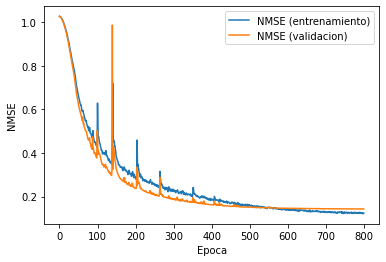

In [27]:
plt.plot(history.history['nmse'], label='NMSE (entrenamiento)')
plt.plot(history.history['val_nmse'], label='NMSE (validacion)')
plt.xlabel('Epoca')
plt.ylabel('NMSE')
plt.legend()
plt.show()

In [ ]:
Guardar modelo

In [28]:
# Directorio en donde se almacenara el modelo
save_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/modelos_generados'
os.makedirs(save_dir, exist_ok=True)  # Crear el directorio si no existe

# Nombre del archivo del modelo
model_name = 'unet_model_decay_coseno_1.h5'

# Ruta completa del archivo
model_path = os.path.join(save_dir, model_name)

# Guardar el modelo entrenado
model.save(model_path)

In [ ]:
Predecir señal VSC a partir de una señal PAM

In [ ]:

# Funcion para predecir con el modelo entrenado
def predict_with_model(model, input_data):
    prediction = model.predict(input_data)
    return prediction

# Cargar una matriz de entrada para hacer una predicción 
input_matrix = X[0:1] 
# Realizar la predicción
predicted_output = predict_with_model(model, input_matrix)

# Mostrar la predicción
print("Predicción de la primera muestra de entrada:")
print(predicted_output)